In [1]:
#importing libraries
import sys
import json
import time
from telnetlib import Telnet
import serial
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
ser = serial.Serial('COM4', 9600, timeout=1);
tn=Telnet('localhost',13854);

start=time.clock();

i=0;
tn.write(b'{"enableRawOutput": true, "format": "Json"}');

eSenseDict={'attention':0, 'meditation':0};
waveDict={'lowGamma':0, 'highGamma':0, 'highAlpha':0, 'delta':0, 'highBeta':0, 'lowAlpha':0, 'lowBeta':0, 'theta':0};
signalLevel=0;

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xaa in position 0: invalid start byte

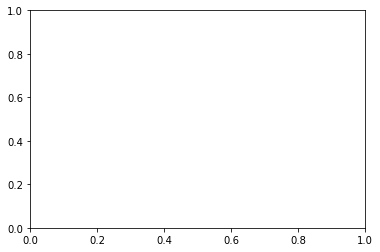

In [3]:
EEGDATAFRAME = pd.DataFrame(columns=['Attention', 'Meditation','Blink_Strength'])


while i<100:
    eeg_data = []

    blinkStrength=0;

    line=tn.read_until(b'\r');

    if len(line) > 20:
        timediff=time.clock()-start;
        dict=json.loads((line));
        if "poorSignalLevel" in dict:
            signalLevel=dict['poorSignalLevel'];
        if "blinkStrength" in dict:
            blinkStrength=dict['blinkStrength'];
        if "eegPower" in dict:
            waveDict=dict['eegPower'];
            eSenseDict=dict['eSense'];

        attentionStr=str(eSenseDict['attention']);
        meditationStr=str(eSenseDict['meditation']);
        blinkStrengthStr=str(blinkStrength);

        eeg_data.append({'Attention': attentionStr, 'Meditation': meditationStr, 'Blink_Strength':blinkStrengthStr})
        print(eeg_data);
        eeg_df = pd.DataFrame(eeg_data)
        EEGDATAFRAME = EEGDATAFRAME.append(eeg_df, ignore_index=True)
        print(EEGDATAFRAME) 

#         print("Attention: " + attentionStr);
#         print("Meditation: " + meditationStr);
#         print("Blink Strength: " + blinkStrengthStr);
#         print("");

        attentionInt = int(attentionStr)
        if attentionInt > 70:
            ser.write(str.encode('a'));
            time.sleep(1)

        meditationInt = int(meditationStr)
        if meditationInt > 70:
            ser.write(str.encode('b'));
            time.sleep(1)

        blinkStrengthInt = int(blinkStrengthStr)
        if blinkStrengthInt > 1:
            ser.write(str.encode('c'));
            time.sleep(1)

ser.close();
tn.close();